# Wstęp
Zadanie 10 jest pierwszą częścią zajęć laboratoryjnych poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem prac będzie sieć rekurencyjna do predykcji kursu kryptowaluty Bitcoin (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.   EmoTweet - model sieci rekurencyjnej do analizy emocji (10 pkt., laboratorium 10)
2. Agregacja informacji emotywnej i przygotowanie MultiBTC - multimodalnego model sieci rekurencyjnej do predykcji kursu BTC (10 pkt., laboratorium 11)
3. Ewaluacja modelu MultiBTC (10 pkt., laboratorium 12)

Łącznie można otrzymać 30 punktów.

# Cel ćwiczenia

Celem pierwszego etapu prac jest zapoznanie się z podstawową siecią rekurencyjną LSTM. Ze względu na fakt, że model ten będzie wykorzystany do analizy emocji tekstu, w ramach teorii do zadania zostanie omówiony podstawowy mechanizm konwersji słów w tekście do postaci wektorów dystrybucyjnych (tzw. word embeddings) na podstawie rozwiązania o nazwie `fastText`. Modele będą budowane na ogólnodostępnym zbiorze `TweetEval`, zawierającym podzbiory ręcznie anotowanych tweetów przy pomocy etykiet odnoszących się do następujących zjawisk: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

# Warunki zaliczenia

Do zaliczenia pierwszego etapu należy utworzyć następujące modele dla min. 2 wybranych zjawisk:

1.   Model bazowy (regresja logistyczna).
2.   Model rekurencyjny oparty o sieć LSTM.

Wytrenowane modele będą wykorzystane w 2 etapie, dlatego proszę je zachować.

# Wektory dystrybucyjne

W przetwarzaniu języka naturalnego, o wektorach dystrybucyjnych (inaczej osadzeniach lub zanurzeniach, ang. word embeddings) mówi się w kontekście reprezentacji słów w tekście, zazwyczaj w postaci wektora liczb rzeczywistych, który koduje znaczenie słowa. Hipoteza dystrybucyjna, u podstawy której leży większość metod reprezentacji, mówi o tym, że słowa, które często współwystępują, mają podobne znaczenie. Wektory dystrybucyjne można uzyskać za pomocą zestawu technik modelowania języka, w których słowa lub frazy są mapowane do wektorów liczb rzeczywistych. Z reguły polega to na matematycznym zanurzeniu z przestrzeni o wielu wymiarach opisujących słowo (konteksty) do ciągłej przestrzeni wektorowej o znacznie mniejszym wymiarze.

Metody generowania tego odwzorowania obejmują sieci neuronowe, redukcję wymiarowości na macierzy współwystępowania słów, modele probabilistyczne lub jawną reprezentację w kontekście, w którym pojawiają się słowa. Wektory dystrybucyjne, używane jako podstawowa reprezentacja wejściowa tekstu, okazały się istotnie poprawiać jakość w wielu zadaniach NLP, takich jak np. rozpoznawanie nazw własnych, określanie części mowy, rozpoznawanie dziedziny tekstu, czy też rozpoznawanie wydźwięku i emocji w tekście.

# fastText

[fastText](https://fasttext.cc/) jest biblioteką do efektywnego uczenia modeli reprezentacji wektorowych słów oraz do budowania klasyfikatorów tekstu. Modele językowe można budować z wykorzystaniem dwóch popularnych technik: [Continuous Bag of Words](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html) oraz [Skip-Gram](https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c).

## Instalacja

Pobranie repozytorium projektu:


In [1]:
import os

In [2]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3998 (delta 890), reused 859 (delta 826), pack-reused 2972
Receiving objects: 100% (3998/3998), 8.30 MiB | 24.63 MiB/s, done.
Resolving deltas: 100% (2528/2528), done.


Instalacja biblioteki:

In [3]:
!cd fastText && mkdir build && cd build && cmake ..  && make && make install

CMake Deprecation Warning at CMakeLists.txt:9 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done (1.3s)
-- Generating done (0.0s)
-- Build files have been written to: /content/fastText/build
[  2%] Building CXX object CMakeFiles/fasttext-shared.dir/src/args.cc.o
[ 

Instalacja API do Pythona:

In [4]:
!cd fastText && pip install .

Processing /content/fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4239625 sha256=7c17babd751d89307dfe34b01a62853e3c9440466444238a3f6a5cb44bd18ae2
  Stored in directory: /tmp/pip-ephem-wheel-cache-txj_ebq6/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully built fasttext


# Dane do etapu nr 1

## Korpus
Korpus (zbiór dokumentów) do realizacji etapu nr 1 pochodzi z repozytorium [TweetEval](https://github.com/cardiffnlp/tweeteval). Repozytorium zawiera 7 różnorodnych zbiorów danych, zawierających zanonimizowane wpisy z [Twittera](https://twitter.com), anotowane następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/cardiffnlp/tweeteval '/content/drive/My Drive/tweeteval'
data_dir = '/content/drive/My Drive/tweeteval'

Mounted at /content/drive
fatal: destination path '/content/drive/My Drive/tweeteval' already exists and is not an empty directory.


## Zawartość korpusu

W katalogu głównym (tweeteval) znajdują się następujące elementy:
*   `datasets` - katalog ze zbiorami danych
   * `emotion` - tweety anotowane emocjami
     * `mapping.txt` - identyfikatory etykiet oraz ich opis
     * `train_text.txt` - wpisy z Twittera (część ucząca)
     * `train_labels.txt` - etykiety wpisów z Twittera (część ucząca)
     * `test_*.txt, valid_*.txt` - j.w. (część testowa i walidacyjna)
   * `emoji` - tweety anotowane emotikonami
   * `...` - katalogi zawierające tweety anotowane pozostałymi zjawiskami
*   `predictions` - katalog z przykładowymi predykcjami
   * `emotion.txt` - etykiety modelu predykcyjnego dla części testowej danych `emotion`
   * `emoji.txt` - j.w. dla cz. testowej danych `emoji`
   * `...` - j.w. dla pozostałych danych
*   `evaluation_script.py` - skrypt do ewaluacji

## Model języka

Na potrzeby zadania został przygotowany model Skip-Gram reprezentacji wektorowej słów, zbudowany na wielkim korpusie tweetów dotyczących kursu BTC. Wersja binarna tego modelu dostępna jest w 2 wariantach:
* wektory 100-elementowe (1.7GB, fasttext_tweetmodel_btc_sg_100_en.bin)
* wektory 20-elementowe (350MB, fasttext_tweetmodel_btc_sg_20_en.bin)

Na potrzeby prezentacji przykładowego rozwiązania zostanie wykorzystany mniejszy model. Do realizacji ostatecznego rozwiązania należy wykorzystać większy model.



# Model bazowy rozpoznawania emocji

Model bazowy, zbudowany z wykorzystaniem narzędzia fastText (oparty o regresję logistyczną), będzie punktem wyjścia do porównania się z modelami opartymi o sieci LSTM, których skonstruowanie i ewaluacja na wybranych zadaniach będzie celem etapu nr 1.

Pobranie mniejszego modelu reprezentacji języka tweetów:


In [6]:
# należy wgrać plik z katalogu "dane" o nazwie fasttext_tweetmodel_btc_sg_20_en.bin

Wydobycie słownika wektorów z binarnego modelu języka:

In [7]:
!python fastText/python/doc/examples/bin_to_vec.py "drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_20_en.bin" > "drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_20_en.vec"

Dodanie prefiksu `__label__` do etykiet zbioru `emotion`:

In [8]:
!sed 's/^/__label__/g' "drive/My Drive/tweeteval/datasets/emotion/train_labels.txt" > "drive/My Drive/tweeteval/train_labels_emo.txt"
!sed 's/^/__label__/g' "drive/My Drive/tweeteval/datasets/emotion/test_labels.txt" > "drive/My Drive/tweeteval/test_labels_emo.txt"
!sed 's/^/__label__/g' "drive/My Drive/tweeteval/datasets/emotion/val_labels.txt" > "drive/My Drive/tweeteval/val_labels_emo.txt"

Przygotowanie zbioru uczącego, testowego i walidacyjnego w formacie `fastText`:

In [9]:
!paste -d " " "drive/My Drive/tweeteval/datasets/emotion/train_text.txt" "drive/My Drive/tweeteval/train_labels_emo.txt" > "drive/My Drive/tweeteval/train_emo.txt"
!paste -d " " "drive/My Drive/tweeteval/datasets/emotion/test_text.txt" "drive/My Drive/tweeteval/test_labels_emo.txt" > "drive/My Drive/tweeteval/test_emo.txt"
!paste -d " " "drive/My Drive/tweeteval/datasets/emotion/val_text.txt" "drive/My Drive/tweeteval/val_labels_emo.txt" > "drive/My Drive/tweeteval/val_emo.txt"

Trenowanie modelu z wykorzystaniem wejścia `train_emo.txt`, z określeniem wyjściowej nazwy modelu `emo_model`, dla wektorów słów o wymiarze `20`, z wykorzystaniem pretrenowanych wektorów z pliku `fasttext_tweetmodel_btc_sg_20_en.vec` i z uruchomieniem dostrajania hiperparametrów na zbiorze walidacyjnym `val_emo.txt`:

In [10]:
!fasttext supervised -input "drive/My Drive/tweeteval/train_emo.txt" -output emo_model -dim 20 -pretrainedVectors "drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_20_en.vec" -autotune-validation "drive/My Drive/tweeteval/val_emo.txt"

Progress: 100.0% Trials:   14 Best score:  0.673797 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  12887
Number of labels: 4
Progress: 100.0% words/sec/thread:   48854 lr:  0.000000 avg.loss:  0.595434 ETA:   0h 0m 0s


Podstawowa ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision) i kompletność (R - recall) w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

In [11]:
!fasttext test emo_model.bin "drive/My Drive/tweeteval/test_emo.txt"

N	1421
P@1	0.69
R@1	0.69


Rozszerzona ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision), kompletność (R - recall) oraz F1-score dla każdej etykiety w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

In [12]:
!fasttext test-label emo_model.bin "drive/My Drive/tweeteval/test_emo.txt"

F1-Score : 0.768615  Precision : 0.694645  Recall : 0.860215   __label__0
F1-Score : 0.673657  Precision : 0.674541  Recall : 0.672775   __label__3
F1-Score : 0.660436  Precision : 0.746479  Recall : 0.592179   __label__1
F1-Score : 0.340426  Precision : 0.492308  Recall : 0.260163   __label__2
N	1421
P@1	0.690
R@1	0.690


Przygotowanie danych do ewaluacji z wykorzystaniem skryptu dołączonego do zbioru TweetEval:

In [13]:
!mkdir "drive/My Drive/tweeteval/predictions2"

mkdir: cannot create directory ‘drive/My Drive/tweeteval/predictions2’: File exists


In [14]:
!fasttext predict emo_model.bin "drive/My Drive/tweeteval/datasets/emotion/test_text.txt" | sed 's/__label__//g' > "drive/My Drive/tweeteval/predictions2/emotion.txt"

Uruchomienie ewaluacji. Oprócz wyników P, R, F1 [weighted]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)) dla każdej etykiety, otrzymujemy również wyniki w wariancie [macro]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)). **Ostateczną miarą (TweetEval Score) jest miara F1-score w wariancie macro i tę miarę proszę traktować jako kluczową przy porównywaniu rozwiązań.**

In [15]:
!python "drive/My Drive/tweeteval/evaluation_script.py" --tweeteval_path "drive/My Drive/tweeteval/datasets" --predictions_path "drive/My Drive/tweeteval/predictions2" --task emotion

0 {'precision': 0.6946454413892909, 'recall': 0.8602150537634409, 'f1-score': 0.7686148919135308, 'support': 558}
1 {'precision': 0.7464788732394366, 'recall': 0.5921787709497207, 'f1-score': 0.660436137071651, 'support': 358}
2 {'precision': 0.49230769230769234, 'recall': 0.2601626016260163, 'f1-score': 0.34042553191489366, 'support': 123}
3 {'precision': 0.6745406824146981, 'recall': 0.6727748691099477, 'f1-score': 0.673656618610747, 'support': 382}
accuracy 0.6903589021815623
macro avg {'precision': 0.6519931723377794, 'recall': 0.5963328238622814, 'f1-score': 0.6107832948777057, 'support': 1421}
weighted avg {'precision': 0.6847853481711494, 'recall': 0.6903589021815623, 'f1-score': 0.6787701727616035, 'support': 1421}
------------------------------
TweetEval Score (emotion): 0.6107832948777057


# Budowa modeli EmoTweet

W tej sekcji Państwa zadaniem będzie przygotowanie modeli sieci LSTM oraz modeli bazowych opartych o regresję logistyczną (fastText) dla wybranych 2 zjawisk ze zbioru TweetEval. Dla sieci LSTM kolejne jednostki sieci rekurencyjnej na wejściu dostają reprezentację wektorową kolejnych wyrazów w tekście. Wyjście z ostatniej jednostki podlega klasyfikacji. W celu usprawnienia zadania, przedstawiona zostanie metoda reprezentacji wektorowej tekstu z wykorzystaniem Pythonowego API do narzędzia fastText. Do ewaluacji modeli należy wykorzystać uprzednio zaprezentowany skrypt `tweeteval/evaluation_script.py`.

## Wektoryzacja tekstu


In [16]:
# inicjalizacja biblioteki
import fasttext

In [17]:
# ładowanie modelu
MODEL_PATH = 'drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_20_en.bin'
model = fasttext.load_model(MODEL_PATH)

In [18]:
# wczytanie danych treningowych
import pandas as pd
TRAIN_PATH = 'drive/My Drive/tweeteval/datasets/emotion/train_text.txt'
train_texts = pd.read_csv(TRAIN_PATH, sep='\t', header=None)
train_texts

,0
0,“Worry is a down payment on a problem you may ...
1,My roommate: it's okay that we can't spell bec...
2,No but that's so cute. Atsu was probably shy a...
3,Rooneys fucking untouchable isn't he? Been fuc...
4,it's pretty depressing when u hit pan on ur fa...
...,...
3252,I get discouraged because I try for 5 fucking ...
3253,The @user are in contention and hosting @user ...
3254,@user @user @user @user @user as a fellow UP g...
3255,You have a #problem? Yes! Can you do #somethin...


In [19]:
# wektoryzacja pierwszego tekstu
first_text = train_texts[0][0]
for word in fasttext.tokenize(first_text):
  print(word, model.get_word_id(word), model.get_word_vector(word))

“Worry -1 [-0.04189867  0.15429688  0.96717507  1.3809655   0.49123076 -0.5447607
 -0.11276884  0.20356484 -1.0640966  -1.6616327   0.03930127 -0.7224096
  0.21334486 -0.5872285   0.2898182   0.81751084 -1.6077403   1.8038087
  0.4850348   1.0643197 ]
is 6 [ 0.24099417  0.13544752  0.7251924   0.32544732  0.27421224  0.31903243
  0.7501186   0.22853182 -0.91543657  0.08587569  0.13866538 -0.38624704
 -0.30637258  0.13666666 -0.43992838 -0.12443608 -1.0383893  -0.06567164
  0.17007533 -0.16708991]
a 7 [-0.00810981 -0.03934941  0.81658655  0.56301105  0.43812367  0.29547286
  0.4691784   0.07483605 -0.58705056  0.28240088 -0.6339584  -0.16187707
 -0.23376046 -0.1245347   0.03071329 -0.07603034 -0.9066614  -0.07007706
  0.4522892  -0.15033531]
down 174 [ 0.9175071  -1.0815151   0.07119758  0.34226617  0.9607946   0.5973182
  0.91058624 -0.32068744 -0.72137564  1.2241784  -0.1882128  -0.23591968
 -0.02596712 -0.10194965 -0.09553405  0.36303622  0.22354192  0.4901933
  0.5405883   0.5965071

Proszę zwrócić uwagę, że fastText jest w stanie przyporządkować reprezentację wektorową nawet dla takich słów, których model języka nie widział w trakcie uczenia (pierwszy token wejściowego tekstu).

## Model klasyfikacji tekstu LSTM (2 pkt.)

In [27]:
device = 'cpu'

In [126]:
import fasttext
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.metrics import classification_report

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout = 0.05):
        super().__init__()

        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, self.hidden_dim, self.num_layers, batch_first = True, dropout = dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax()
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)

        output, (hidden_state, _) = self.lstm(x, (h0, c0))
        output = self.dropout(hidden_state[-1])
        output = self.fc(output)
        output = self.relu(output)
        # output = self.softmax(output)
        return output


class TweetDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.tweets[idx], self.labels[idx]

## Trenowanie modeli LSTM dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)
Należy wybrać 2 z 7 dostępnych podzbiorów z [TweetEval](https://github.com/cardiffnlp/tweeteval) anotowanych następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

In [101]:
MODEL_PATH = 'drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_100_en.bin'
fasttext_model = fasttext.load_model(MODEL_PATH)


In [137]:
def get_dl(text_file, label_file, batch_size = 128):

    with open(text_file, 'r') as file:
        text_data = file.read()

    text_lines = text_data.strip().split('\n')

    text_df = pd.DataFrame(text_lines)

    text_vectors = [torch.tensor([fasttext_model.get_word_vector(word) for word in fasttext.tokenize(text)]) for text in text_df[0]]

    X = pad_sequence(text_vectors, batch_first=True, padding_value=0.0)
    X = X[:, :10]
    labels = pd.read_csv(label_file, sep='\t', header=None).to_numpy()
    y = torch.tensor(labels).squeeze(1)
    data_loader = DataLoader(TensorDataset(X, y), batch_size=batch_size, shuffle=True)

    return data_loader

def make_plot(epoch, train_loss, val_loss, train_acc, val_acc):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(epoch, train_loss, label='train')
  plt.plot(epoch, val_loss, label='val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epoch, train_acc, label='train')
  plt.plot(epoch, val_acc, label='val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()


In [147]:
from typing import Tuple
from torch.utils.data import DataLoader

def count_correct(
    y_pred: torch.Tensor, y_true: torch.Tensor
) -> torch.Tensor:
    preds = torch.argmax(y_pred, dim=1)
    not_bg = (y_true != 255).float()
    return ((preds == y_true).float() * not_bg).sum() / not_bg.sum()

def validate(
    model: nn.Module,
    loss_fn: torch.nn.CrossEntropyLoss,
    dataloader: DataLoader
) -> Tuple[torch.Tensor, torch.Tensor]:
    loss = 0
    correct = 0
    all = 0
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch.to(device))
        all += 1
        loss += loss_fn(y_pred, y_batch.to(device)).sum()
        correct += count_correct(y_pred, y_batch.to(device))
    return loss / all, correct / all

def fit(
    model: nn.Module, optimiser: optim.Optimizer,
    loss_fn: torch.nn.CrossEntropyLoss, train_dl: DataLoader,
    val_dl: DataLoader, epochs: int, patience: int = 5,
    print_metrics: str = True
):
    epoch_log = []
    train_loss_log = []
    val_loss_log = []
    train_acc_log = []
    val_acc_log = []

    best_loss = np.inf
    counter = 0
    for epoch in range(epochs):
        epoch_log.append(epoch)

        for X_batch, y_batch in tqdm(train_dl):
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimiser.step()
            optimiser.zero_grad()
            model.eval()

        with torch.no_grad():
            train_loss, train_acc = validate(model, loss_fn, train_dl)
            val_loss, val_acc = validate(model, loss_fn, val_dl)

            train_loss_log.append(train_loss.item())
            val_loss_log.append(val_loss.item())

            train_acc_log.append(train_acc.item())
            val_acc_log.append(val_acc.item())


        if print_metrics:
            print(
                f"Epoch {epoch}: "
                f"train loss = {train_loss:.3f} (acc: {train_acc:.3f}), "
                f"validation loss = {val_loss:.3f} (acc: {val_acc:.3f})"
            )
        if val_loss > best_loss:
          counter += 1
          if counter > patience:
            break
        else:
          best_loss = val_loss
          counter = 0
    return epoch_log, train_loss_log, val_loss_log, train_acc_log, val_acc_log

In [130]:
train_text_irony = '/content/drive/My Drive/tweeteval/datasets/irony/train_text.txt'
train_label_irony = '/content/drive/My Drive/tweeteval/datasets/irony/train_labels.txt'
test_text_irony = '/content/drive/My Drive/tweeteval/datasets/irony/val_text.txt'
test_label_irony = '/content/drive/My Drive/tweeteval/datasets/irony/val_labels.txt'

train_loader_irony = get_dl(train_text_irony, train_label_irony, batch_size = 128)
val_loader_irony = get_dl(test_text_irony, test_label_irony, batch_size = 128)

In [149]:
train_text_off = '/content/drive/My Drive/tweeteval/datasets/offensive/train_text.txt'
train_label_off = '/content/drive/My Drive/tweeteval/datasets/offensive/train_labels.txt'
test_text_off = '/content/drive/My Drive/tweeteval/datasets/offensive/val_text.txt'
test_label_off = '/content/drive/My Drive/tweeteval/datasets/offensive/val_labels.txt'

train_loader_off = get_dl(train_text_off, train_label_off, batch_size = 128)
val_loader_off = get_dl(test_text_off, test_label_off, batch_size = 128)

In [145]:
embedding_dim = 100
hidden_dim = 32
num_layers = 2
output_dim = 2
num_epochs = 50

100%|██████████| 23/23 [00:00<00:00, 77.53it/s]


Epoch 0: train loss = 0.719 (acc: 0.506), validation loss = 0.730 (acc: 0.468)


100%|██████████| 23/23 [00:00<00:00, 77.33it/s]


Epoch 1: train loss = 0.701 (acc: 0.505), validation loss = 0.701 (acc: 0.482)


100%|██████████| 23/23 [00:00<00:00, 80.52it/s]


Epoch 2: train loss = 0.698 (acc: 0.495), validation loss = 0.697 (acc: 0.527)


100%|██████████| 23/23 [00:00<00:00, 82.52it/s]


Epoch 3: train loss = 0.702 (acc: 0.505), validation loss = 0.707 (acc: 0.477)


100%|██████████| 23/23 [00:00<00:00, 79.39it/s]


Epoch 4: train loss = 0.699 (acc: 0.489), validation loss = 0.695 (acc: 0.522)


100%|██████████| 23/23 [00:00<00:00, 80.61it/s]


Epoch 5: train loss = 0.696 (acc: 0.507), validation loss = 0.697 (acc: 0.475)


100%|██████████| 23/23 [00:00<00:00, 79.03it/s]


Epoch 6: train loss = 0.696 (acc: 0.507), validation loss = 0.698 (acc: 0.475)


100%|██████████| 23/23 [00:00<00:00, 76.34it/s]


Epoch 7: train loss = 0.698 (acc: 0.493), validation loss = 0.694 (acc: 0.525)


100%|██████████| 23/23 [00:00<00:00, 77.50it/s]


Epoch 8: train loss = 0.700 (acc: 0.504), validation loss = 0.706 (acc: 0.477)


100%|██████████| 23/23 [00:00<00:00, 80.03it/s]


Epoch 9: train loss = 0.699 (acc: 0.505), validation loss = 0.702 (acc: 0.486)


100%|██████████| 23/23 [00:00<00:00, 74.64it/s]


Epoch 10: train loss = 0.698 (acc: 0.495), validation loss = 0.693 (acc: 0.527)


100%|██████████| 23/23 [00:00<00:00, 79.94it/s]


Epoch 11: train loss = 0.702 (acc: 0.497), validation loss = 0.695 (acc: 0.526)


100%|██████████| 23/23 [00:00<00:00, 78.94it/s]


Epoch 12: train loss = 0.714 (acc: 0.493), validation loss = 0.701 (acc: 0.530)


100%|██████████| 23/23 [00:00<00:00, 77.44it/s]


Epoch 13: train loss = 0.695 (acc: 0.505), validation loss = 0.698 (acc: 0.473)


100%|██████████| 23/23 [00:00<00:00, 73.66it/s]


Epoch 14: train loss = 0.699 (acc: 0.504), validation loss = 0.706 (acc: 0.473)


100%|██████████| 23/23 [00:00<00:00, 80.48it/s]


Epoch 15: train loss = 0.694 (acc: 0.494), validation loss = 0.692 (acc: 0.522)


100%|██████████| 23/23 [00:00<00:00, 81.40it/s]


Epoch 16: train loss = 0.695 (acc: 0.494), validation loss = 0.693 (acc: 0.522)


100%|██████████| 23/23 [00:00<00:00, 77.98it/s]


Epoch 17: train loss = 0.693 (acc: 0.502), validation loss = 0.698 (acc: 0.483)


100%|██████████| 23/23 [00:00<00:00, 80.25it/s]


Epoch 18: train loss = 0.661 (acc: 0.614), validation loss = 0.681 (acc: 0.575)


100%|██████████| 23/23 [00:00<00:00, 77.94it/s]


Epoch 19: train loss = 0.683 (acc: 0.583), validation loss = 0.712 (acc: 0.532)


100%|██████████| 23/23 [00:00<00:00, 79.46it/s]


Epoch 20: train loss = 0.653 (acc: 0.630), validation loss = 0.705 (acc: 0.560)


100%|██████████| 23/23 [00:00<00:00, 66.11it/s]


Epoch 21: train loss = 0.631 (acc: 0.667), validation loss = 0.700 (acc: 0.568)


100%|██████████| 23/23 [00:00<00:00, 57.13it/s]


Epoch 22: train loss = 0.620 (acc: 0.684), validation loss = 0.718 (acc: 0.562)


100%|██████████| 23/23 [00:00<00:00, 53.09it/s]


Epoch 23: train loss = 0.574 (acc: 0.724), validation loss = 0.731 (acc: 0.572)


100%|██████████| 23/23 [00:00<00:00, 57.01it/s]


Epoch 24: train loss = 0.555 (acc: 0.748), validation loss = 0.734 (acc: 0.569)


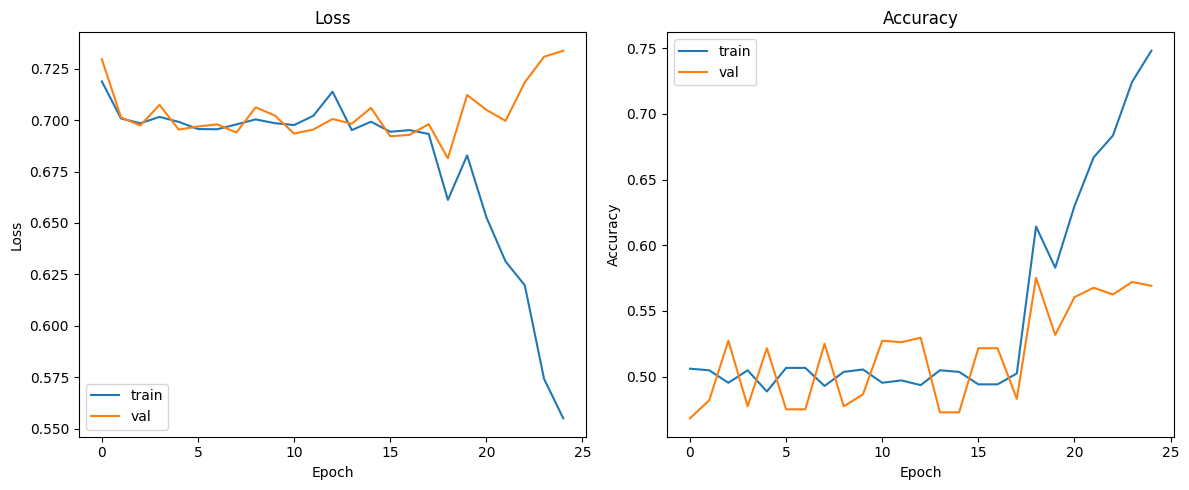

In [148]:
model_lstm_irony = LSTMModel(embedding_dim, hidden_dim,  output_dim,num_layers)
criterion_irony = nn.CrossEntropyLoss()
optimizer_irony = optim.Adam(model_lstm_irony.parameters(), lr=0.01)
make_plot(*fit(model_lstm_irony,optimizer_irony, criterion_irony, train_loader_irony, val_loader_irony, num_epochs))

In [153]:
embedding_dim = 100
hidden_dim = 32
num_layers = 2
output_dim = 2
num_epochs = 50

100%|██████████| 94/94 [00:01<00:00, 75.29it/s]


Epoch 0: train loss = 0.661 (acc: 0.668), validation loss = 0.676 (acc: 0.655)


100%|██████████| 94/94 [00:03<00:00, 25.77it/s]


Epoch 1: train loss = 0.642 (acc: 0.667), validation loss = 0.661 (acc: 0.648)


100%|██████████| 94/94 [00:01<00:00, 48.97it/s]


Epoch 2: train loss = 0.633 (acc: 0.668), validation loss = 0.640 (acc: 0.663)


100%|██████████| 94/94 [00:01<00:00, 74.99it/s]


Epoch 3: train loss = 0.606 (acc: 0.681), validation loss = 0.623 (acc: 0.651)


100%|██████████| 94/94 [00:01<00:00, 77.73it/s]


Epoch 4: train loss = 0.577 (acc: 0.709), validation loss = 0.622 (acc: 0.665)


100%|██████████| 94/94 [00:01<00:00, 76.68it/s]


Epoch 5: train loss = 0.556 (acc: 0.721), validation loss = 0.617 (acc: 0.671)


100%|██████████| 94/94 [00:01<00:00, 77.38it/s]


Epoch 6: train loss = 0.529 (acc: 0.754), validation loss = 0.629 (acc: 0.646)


100%|██████████| 94/94 [00:01<00:00, 76.04it/s]


Epoch 7: train loss = 0.480 (acc: 0.787), validation loss = 0.655 (acc: 0.645)


100%|██████████| 94/94 [00:01<00:00, 58.61it/s]


Epoch 8: train loss = 0.484 (acc: 0.794), validation loss = 0.679 (acc: 0.629)


100%|██████████| 94/94 [00:01<00:00, 54.04it/s]


Epoch 9: train loss = 0.413 (acc: 0.830), validation loss = 0.697 (acc: 0.651)


100%|██████████| 94/94 [00:01<00:00, 53.63it/s]


Epoch 10: train loss = 0.372 (acc: 0.851), validation loss = 0.744 (acc: 0.654)


100%|██████████| 94/94 [00:01<00:00, 77.79it/s]


Epoch 11: train loss = 0.350 (acc: 0.865), validation loss = 0.796 (acc: 0.630)


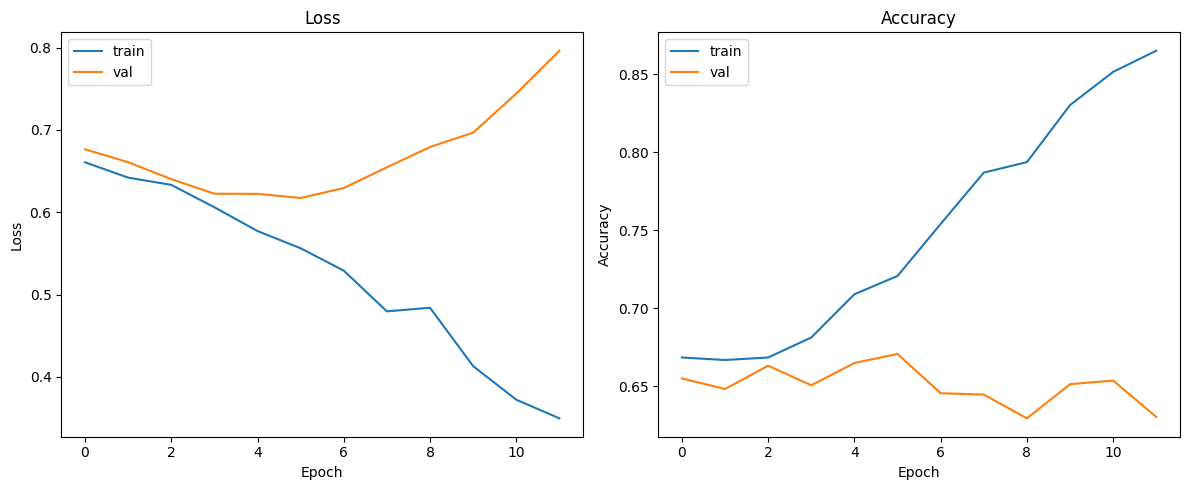

In [154]:
model_lstm_off = LSTMModel(embedding_dim, hidden_dim,  output_dim,num_layers)
criterion_off = nn.CrossEntropyLoss()
optimizer_off = optim.Adam(model_lstm_off.parameters(), lr=0.01)
make_plot(*fit(model_lstm_off,optimizer_off, criterion_off, train_loader_off, val_loader_off, num_epochs))

## Trenowanie modeli LR (fastText) dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)

In [ ]:
!python fastText/python/doc/examples/bin_to_vec.py "drive/My Drive/GSN/fasttext_tweetmodel_btc_sg_100_en.bin" > "drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_100_en.vec"

In [163]:
!sed 's/^/__label__/g' 'drive/My Drive/tweeteval/datasets/irony/train_labels.txt' > 'drive/My Drive/irony_folder/data/train_labels_irony.txt'
!sed 's/^/__label__/g' 'drive/My Drive/tweeteval/datasets/irony/test_labels.txt' > 'drive/My Drive/irony_folder/data/test_labels_irony.txt'
!sed 's/^/__label__/g' 'drive/My Drive/tweeteval/datasets/irony/val_labels.txt' > 'drive/My Drive/irony_folder/data/val_labels_irony.txt'

!paste -d " " 'drive/My Drive/tweeteval/datasets/irony/train_text.txt' 'drive/My Drive/irony_folder/data/train_labels_irony.txt' > 'drive/My Drive/irony_folder/data/train_irony.txt'
!paste -d " " 'drive/My Drive/tweeteval/datasets/irony/test_text.txt' 'drive/My Drive/irony_folder/data/test_labels_irony.txt' > 'drive/My Drive/irony_folder/data/test_irony.txt'
!paste -d " " 'drive/My Drive/tweeteval/datasets/irony/val_text.txt' 'drive/My Drive/irony_folder/data/val_labels_irony.txt' > 'drive/My Drive/irony_folder/data/val_irony.txt'

!fasttext supervised -input 'drive/My Drive/irony_folder/data/train_irony.txt' -output 'drive/My Drive/irony_folder/irony_model' -dim 100 -pretrainedVectors "drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_100_en.vec" -autotune-validation 'drive/My Drive/irony_folder/data/val_irony.txt'

Progress: 100.0% Trials:    5 Best score:  0.641885 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  12561
Number of labels: 2
Progress: 100.0% words/sec/thread:  275182 lr:  0.000000 avg.loss:  0.059509 ETA:   0h 0m 0s


In [164]:
!sed 's/^/__label__/g' 'drive/My Drive/tweeteval/datasets/offensive/train_labels.txt' > 'drive/My Drive/offensive_folder/data/train_labels_offensive.txt'
!sed 's/^/__label__/g' 'drive/My Drive/tweeteval/datasets/offensive/test_labels.txt' > 'drive/My Drive/offensive_folder/data/test_labels_offensive.txt'
!sed 's/^/__label__/g' 'drive/My Drive/tweeteval/datasets/offensive/val_labels.txt' > 'drive/My Drive/offensive_folder/data/val_labels_offensive.txt'

!paste -d " " 'drive/My Drive/tweeteval/datasets/offensive/train_text.txt' 'drive/My Drive/offensive_folder/data/train_labels_offensive.txt' > 'drive/My Drive/offensive_folder/data/train_offensive.txt'
!paste -d " " 'drive/My Drive/tweeteval/datasets/offensive/test_text.txt' 'drive/My Drive/offensive_folder/data/test_labels_offensive.txt' > 'drive/My Drive/offensive_folder/data/test_offensive.txt'
!paste -d " " 'drive/My Drive/tweeteval/datasets/offensive/val_text.txt' 'drive/My Drive/offensive_folder/data/val_labels_offensive.txt' > 'drive/My Drive/offensive_folder/data/val_offensive.txt'

!fasttext supervised -input 'drive/My Drive/offensive_folder/data/train_offensive.txt' -output 'drive/My Drive/offensive_folder/offensive_model' -dim 100 -pretrainedVectors "drive/My Drive/tweeteval/fasttext_tweetmodel_btc_sg_100_en.vec" -autotune-validation 'drive/My Drive/offensive_folder/data/val_offensive.txt'

Progress: 100.0% Trials:    5 Best score:  0.742447 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  36464
Number of labels: 2
Progress: 100.0% words/sec/thread:   54191 lr:  0.000000 avg.loss:  0.322423 ETA:   0h 0m 0s


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_1 (2 pkt.)

In [165]:
model_path = '/content/drive/My Drive/tweeteval'
torch.save(model_lstm_irony.state_dict(), model_path + '/model_lstm_irony.pth')
torch.save(model_lstm_off.state_dict(),  model_path + '/model_lstm_off.pth')

In [172]:
!mkdir "drive/My Drive/tweeteval/predictions_fasttext_irony"

mkdir: cannot create directory ‘drive/My Drive/tweeteval/predictions_fasttext_irony’: File exists


In [173]:
!fasttext predict "drive/My Drive/irony_folder/irony_model.bin" "drive/My Drive/tweeteval/datasets/irony/test_text.txt" | sed 's/__label__//g' > "drive/My Drive/tweeteval/predictions_fasttext_irony/irony.txt"
!python "drive/My Drive/tweeteval/evaluation_script.py" --tweeteval_path "drive/My Drive/tweeteval/datasets" --predictions_path "drive/My Drive/tweeteval/predictions_fasttext_irony" --task irony

0 {'precision': 0.7673860911270983, 'recall': 0.6765327695560254, 'f1-score': 0.7191011235955056, 'support': 473}
1 {'precision': 0.5831062670299727, 'recall': 0.6881028938906752, 'f1-score': 0.631268436578171, 'support': 311}
accuracy 0.6811224489795918
macro avg {'precision': 0.6752461790785356, 'recall': 0.6823178317233503, 'f1-score': 0.6751847800868382, 'support': 784}
weighted avg {'precision': 0.694285293557958, 'recall': 0.6811224489795918, 'f1-score': 0.6842593306587822, 'support': 784}
------------------------------
TweetEval Score (irony): 0.631268436578171


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_2 (2 pkt.)

In [174]:
!mkdir "drive/My Drive/tweeteval/predictions_fasttext_offensive"

In [179]:
!fasttext predict "drive/My Drive/offensive_folder/offensive_model.bin" "drive/My Drive/tweeteval/datasets/offensive/test_text.txt" | sed 's/__label__//g' > "drive/My Drive/tweeteval/predictions_fasttext_offensive/offensive.txt"

In [180]:
!python "drive/My Drive/tweeteval/evaluation_script.py" --tweeteval_path "drive/My Drive/tweeteval/datasets" --predictions_path "drive/My Drive/tweeteval/predictions_fasttext_offensive" --task offensive

0 {'precision': 0.8013605442176871, 'recall': 0.95, 'f1-score': 0.8693726937269373, 'support': 620}
1 {'precision': 0.752, 'recall': 0.39166666666666666, 'f1-score': 0.5150684931506849, 'support': 240}
accuracy 0.7941860465116279
macro avg {'precision': 0.7766802721088435, 'recall': 0.6708333333333333, 'f1-score': 0.692220593438811, 'support': 860}
weighted avg {'precision': 0.7875855086220536, 'recall': 0.7941860465116279, 'f1-score': 0.7704971028684483, 'support': 860}
------------------------------
TweetEval Score (offensive): 0.692220593438811
